# Module 1: Introduction to Machine Learning and Data Processing for Food Sciences

Welcome to the first module of this series! In this module you will first get an overview on what Machine Learning is and how it can be used in Food Science. Then we will move on to a real-world dataset from the [Swiss Food composition database](https://naehrwertdaten.ch/en/) to learn what data pre-processing steps are needed before applying Machine Learning methods on our data. We will be using this processed dataset in the next two modules on supervised and unsupervised Machine Learning.

**Module overview**
1. [Introduction to Machine Learning (ML)](#intro)
2. [ML in Food Science](#food)
3. [Basic data processing for ML](#proc)

**Dataset**       
Throughout this and future modules we will be working with a dataset from the [Swiss Food composition database](https://naehrwertdaten.ch/en/). The dataset contains information on the composition of different foods that are available in Switzerland and is maintained by the Federal Food Safety and Veterinary Office. In this tutorial you will be given a pre-cleaned version of this dataset. If you are interested in the cleaning performed on the original dataset, feel free to look at the following script: `scripts/Clean_FoodCompositionData.ipynb`.

<a id='intro'></a>
## 1. Introduction to Machine Learning (ML)

Machine Learning (ML) has become increasingly prevalent in our daily lives. Text writing programs use ML to autocorrect your texts, search engines use ML to improve your search results, and spam in your email inbox is detected by ML. Although ML has gained significant popularity and widespread use in recent years, it is not a new concept. The term was first coined by Arthur Samuel in 1959. He defined Machine Learning as "the field of study that gives computers the ability to learn without being explicitly programmed". To rephrase this in simpler terms, one can say that **Machine Learning is the field of study that gives computers the ability to learn from data**. 

Data is essential for any ML method. Depending on the type of data we have, we differentiate between **supervised and unsupervised ML**. If the data we have is labelled and we know the groups within, we can use supervised ML methods. Conversely, if our data is not labelled or we decide to ignore any known labels, we can employ unsupervised ML techniques to identify patterns within. You will learn more about both two types of ML in future modules.

There are three distinct steps in **building a ML model** in practice (see [Figure 1](#ml-model)):        
**1)** processing the data     
**2)** training the ML model    
**3)** evaluating the trained model      

The quality of the ML model depends a lot on the quality of the data available to train it. Therefore, a lot of time is spent in practice on processing the raw data (**1) PROCESS**). You will learn more about the usual data processing steps in the [respective section later on](#proc). Once the data is processed, it is split into two parts: the train and test set. The train set is used to train the ML model (**2) TRAIN**) whereas the test set is used to evaluate the model performance (**3) EVALUATE**).        
Once we have found a ML model that performs well on our test set, we can use it to:           
* gain <span style="color:darkred">insights into the processes governing our data</span>
* perform <span style="color:darkgreen">predictions on new data</span>.


<center>
<a id="ml-model"></a>
<img src="images/part1_intro/ml_pipeline.jpg" alt="Machine Learning Model" width="75%">
<center><figcaption><em>Fig 1: Three steps in building a ML model.</em></figcaption></center>
</center>

**💡 CHECKPOINT:**
 - What are the three main steps of the Machine Learning pipeline? 

<a id='food'></a>
## 2. ML in Food Science

<span style="color:red">TODO: Input from experts needed.</span> Draft text from Doriela can be found in `notes/m1_ml_in_food_science.txt`.

<a id='proc'></a>
## 3. Basic data processing for ML

Since ML models are built from data, the performance of the trained models depends on the quality of the data fed into the model. In practice, the data we get from collaborators or the internet might not be standardized. Also, the data might contain erroneous or missing values. Hence, it is crucial to explore and process the data before we use it for training ML models. 

In this section we will introduce some frequently used data pre-processing methods on the Swiss food composition dataset. The pre-processing methods we will cover include:
* [3.2 Data quality control](#quality)
* [3.3 Train-test split](#train-test-split)
* [3.4 Standardization](#stand)

Before diving into these processing methods, we will explore what our dataset is composed of in section [3.1 Anatomy of our data](#anatomy).

To explore and process our dataset we will make use of different Python modules that are imported in the cell below.


In [1]:
# Pandas is used to read and interact with our data across all processing steps
# we import it with an alias "pd"
import pandas as pd

# The below packages are additionally needed for sections 3.2 - 3.4
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Packages needed for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

When the above cell finishes running successfully, you will see `[1]`, in the bottom left corner of the box. This means that the packages are loaded and ready to be used.

### 3.1 Anatomy of our data <a id='anatomy'></a> 

By data we refer to the collection of samples and features. Each **sample** represents a row in our table and is denoted with a unique ID. For each sample, we get a set of **features** that were measured. Features represent certain characteristics of our samples. 

Let us illustrate samples and features structure on our Swiss food composition dataset. To do this, we first have to **load the data**. The dataset is stored in a `.csv` (comma separated values) file and we will save it in a **pandas dataframe**.

In [2]:
dataset = pd.read_csv('data/swiss_food_composition.csv', index_col=0)

In order to find how many samples and features we have in our dataset, we can use the `shape` attribute of the `dataset` dataframe. 

In [3]:
dataset.shape

(1092, 41)

Now, we know that there are 1092 samples (rows) and 41 features (columns) in our dataset.

To see how the first 5 rows of our dataset look we can use the `head()` method.

In [4]:
dataset.head()

,name,category,energy_kcal,fat_g,fatty_acids_sat_g,fatty_acids_monounsat_g,fatty_acids_polyunsat_g,cholesterol_mg,carbohydrates_g,sugars_g,...,potassium_mg,sodium_mg,chloride_mg,calcium_mg,magnesium_mg,phosphorus_mg,iron_mg,iodide_µg,zinc_mg,selenium_µg
ID,,,,,,,,,,,,,,,,,,,,,
0,Agar Agar,other,160.0,0.2,NaN,NaN,NaN,NaN,0.0,NaN,...,52.0,130.0,NaN,660.0,100.0,34.0,4.5,NaN,1.5,NaN
1,Agave syrup,sweets,293.0,0.0,0.0,NaN,NaN,NaN,73.1,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Almond,fruits,624.0,52.1,4.1,31.4,11.4,0.0,7.8,6.6,...,740.0,1.1,40.0,270.0,240.0,510.0,3.3,0.2,3.3,2.2
3,"Almond, dry roasted, salted",nuts,637.0,52.5,4.1,33.1,13.0,0.0,10.1,4.9,...,710.0,230.0,1190.0,270.0,280.0,470.0,3.7,2.4,3.3,2.0
4,"Almond, roasted, salted",nuts,649.0,55.2,4.2,34.8,13.5,0.0,7.2,4.6,...,670.0,330.0,1190.0,240.0,270.0,470.0,3.3,2.4,3.1,2.0


To see how the last 5 rows of our dataset look we can use the `tail()` method.

In [5]:
dataset.tail()

,name,category,energy_kcal,fat_g,fatty_acids_sat_g,fatty_acids_monounsat_g,fatty_acids_polyunsat_g,cholesterol_mg,carbohydrates_g,sugars_g,...,potassium_mg,sodium_mg,chloride_mg,calcium_mg,magnesium_mg,phosphorus_mg,iron_mg,iodide_µg,zinc_mg,selenium_µg
ID,,,,,,,,,,,,,,,,,,,,,
1087,"Zucchini piccata, prepared",other,124.0,8.0,2.2,4.0,1.0,65.0,6.6,1.8,...,210.0,93.0,150.0,76.0,24.0,97.0,0.9,11.0,0.7,NaN
1088,"Zucchini slices, breaded, prepared",other,127.0,5.5,0.7,3.4,0.9,44.0,13.5,2.1,...,210.0,89.0,160.0,28.0,24.0,65.0,1.0,7.3,0.5,NaN
1089,"Zucchini, raw",vegetables,19.0,0.2,0.0,0.0,0.1,0.0,2.0,1.9,...,230.0,3.0,24.0,19.0,23.0,31.0,0.8,2.3,0.2,NaN
1090,"Zucchini, steamed (without addition of salt)",vegetables,20.0,0.2,0.0,0.0,0.1,0.0,2.2,2.1,...,220.0,2.9,26.0,21.0,24.0,33.0,0.7,2.5,0.3,NaN
1091,"Zucchini, stewed (without addition of fat and ...",vegetables,23.0,0.2,0.0,0.0,0.1,0.0,2.4,2.3,...,240.0,3.4,30.0,24.0,25.0,39.0,0.9,2.9,0.3,NaN


We can see in the above data excerpts that each sample is linked with a unique row `ID` ranging from `1` to `1091`. 

### 3.2 Data Quality Control <a id='quality'></a>

The first step in the data pre-processing phase is to assess the quality of our data. There are different ways how to inspect this and here we will explore some of them.

#### Find number of missing values

Let us start by getting some information regarding what type of data the dataset contains. For this we will use the `info()` method of the `dataset`. Besides listing the data types of each column, it shows how many non-empy (`non-null`) values are there for each feature.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092 entries, 0 to 1091
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       1092 non-null   object 
 1   category                   1092 non-null   object 
 2   energy_kcal                1092 non-null   float64
 3   fat_g                      1092 non-null   float64
 4   fatty_acids_sat_g          1087 non-null   float64
 5   fatty_acids_monounsat_g    1085 non-null   float64
 6   fatty_acids_polyunsat_g    1085 non-null   float64
 7   cholesterol_mg             1080 non-null   float64
 8   carbohydrates_g            1092 non-null   float64
 9   sugars_g                   1087 non-null   float64
 10  starch_g                   1038 non-null   float64
 11  fibres_g                   1091 non-null   float64
 12  protein_g                  1092 non-null   float64
 13  salt_g                     1092 non-null   float

Most of the columns hold decimal values, which in Python corresponds to the **float64** data type.
The first two columns, `Name` and `Category` are `strings` (sequences of characters) and `pandas` recognizes them as objects.

The missing values in the dataset are recorded as `NaN`s. Here is an example: 

In [7]:
dataset.iloc[0:1, :]

,name,category,energy_kcal,fat_g,fatty_acids_sat_g,fatty_acids_monounsat_g,fatty_acids_polyunsat_g,cholesterol_mg,carbohydrates_g,sugars_g,...,potassium_mg,sodium_mg,chloride_mg,calcium_mg,magnesium_mg,phosphorus_mg,iron_mg,iodide_µg,zinc_mg,selenium_µg
ID,,,,,,,,,,,,,,,,,,,,,
0,Agar Agar,other,160.0,0.2,NaN,NaN,NaN,NaN,0.0,NaN,...,52.0,130.0,NaN,660.0,100.0,34.0,4.5,NaN,1.5,NaN


For `Agar Agar` there is no value for `fatty_acids_sat_g`, `fatty_acids_monounsat_g`, `fatty_acids_polyunsat_g`, etc.

#### Removing features with a lot of missing values

The features (columns) that have a lot of missing values will not be useful for the models, so we can remove them. Determining what *a lot* means depends on the context and task at hand. In our case, we will remove the features that have more than 20% of the values missing. For this we will first find the actual minimum number of rows that have to contain a value per feature. This will be the `feature_threshold`. 

Since we will remove features that have more than 20% of the data missing, we will keep those that have at least 80%. We have 1092 samples in total, this means that we will keep features that have at least $$\left\lceil 0.8*1092=873.6\right\rceil = 874$$ non-missing values. 

First, we will print the number of `NaN` values per column.

In [8]:
nan_total_col = dataset.isna().sum(axis=0)
nan_total_col

name                           0
category                       0
energy_kcal                    0
fat_g                          0
fatty_acids_sat_g              5
fatty_acids_monounsat_g        7
fatty_acids_polyunsat_g        7
cholesterol_mg                12
carbohydrates_g                0
sugars_g                       5
starch_g                      54
fibres_g                       1
protein_g                      0
salt_g                         0
alcohol_g                      4
water_g                        2
vit_A_activity_re_µg          13
vit_A_activity_rae_µg         13
retinol_µg                    10
beta_carotene_activity_µg     19
beta_carotene_µg              21
vit_B1_mg                      7
vit_B2_mg                      6
vit_B6_mg                      7
vit_B12_µg                    10
niacin_mg                     40
folate_µg                     17
panthotenic_acid_mg           12
vit_c_mg                      13
vit_d_µg                      11
vit_e_acti

From the list above, we will remove all columns that have more than 1092-874 = 218 missing values. Only the `selenium_µg` has more than 218 missing values.

The above code cell does the following:

It checks each value of the dataset and marks it with 1 if it is a `nan` and with a 0 otherwise. Then, it computes the sum of each column using the `sum()` method with the `axis=0`. In this way we find the number of 1s per column, which means the number of values that are `nan`s per column. You can find a visual explanation on [Figure 2](#boolean-mask-illustration) below.

Now we can drop the columns that have more than 20% of the values missing:

In [9]:
percentage_present = 0.8
feature_threshold = math.ceil(percentage_present*dataset.shape[0]) # 20% of values missing
feature_threshold

874

In [10]:
columns_before = dataset.columns
dataset = dataset.dropna(axis=1, thresh=feature_threshold)
columns_after = dataset.columns
columns_after

Index(['name', 'category', 'energy_kcal', 'fat_g', 'fatty_acids_sat_g',
       'fatty_acids_monounsat_g', 'fatty_acids_polyunsat_g', 'cholesterol_mg',
       'carbohydrates_g', 'sugars_g', 'starch_g', 'fibres_g', 'protein_g',
       'salt_g', 'alcohol_g', 'water_g', 'vit_A_activity_re_µg',
       'vit_A_activity_rae_µg', 'retinol_µg', 'beta_carotene_activity_µg',
       'beta_carotene_µg', 'vit_B1_mg', 'vit_B2_mg', 'vit_B6_mg', 'vit_B12_µg',
       'niacin_mg', 'folate_µg', 'panthotenic_acid_mg', 'vit_c_mg', 'vit_d_µg',
       'vit_e_activity_mg', 'potassium_mg', 'sodium_mg', 'chloride_mg',
       'calcium_mg', 'magnesium_mg', 'phosphorus_mg', 'iron_mg', 'iodide_µg',
       'zinc_mg'],
      dtype='object')

In the first code cell we declare a variable, `feature_threshold = math.ceil(0.8*dataset.shape[0])` to be the threshold according to which we are discarding columns. It gets the number of samples using the first entry of the `dataset.shape` attribute which returns a `tuple`. Then, we save the columns we had to see later what was removed. Afterwards, we apply the `dropna()` method to drop all columns (determined by the `axis=1` argument), that have less than `feature_threshold` non-missing values. We save the columns after the drop as well.

In [11]:
columns_before.difference(columns_after)

Index(['selenium_µg'], dtype='object')

The `difference` method does set difference on the two lists specified. As you can see, `selenium_µg` is not present anymore in the columns list. The code cell below counts the number of columns. Now we have 40 columns, from 41 that we had before.

In [12]:
len(dataset.columns)

40

#### Removing samples with a lot of missing values

We will remove the samples that have more than  20% of the values missing. This means that we will keep the samples that have more than 80% of the features. With some quick math we find that: $$\left\lceil0.8*41 = 32.8 \right\rceil = 33$$ This means that we will keep the samples that have 33 or more features.

In [13]:
nan_total_rows = dataset.isna().sum(axis=1)
nan_total_rows

ID
0       24
1       30
2        0
3        0
4        0
        ..
1087     0
1088     0
1089     0
1090     0
1091     0
Length: 1092, dtype: int64

The code cell above finds the number of missing values per each sample. This time we sum row-wise by specifying the `axis=1` argument in the `sum()` method. [Figure 2](#boolean-mask-illustration) illustrates how the `isna()` and `sum()` methods work to calculate the number of `NaN`s per each sample and per each feature. Note that we just show an example of the output for the first 3 samples and 8 columns. After creating the boolean masks ('tables' with 0s and 1s), it finds the sum per row or per column, based on the `axis` value we pass as argument to `sum()` and find the number of missing values.

<center>
    <a id="boolean-mask-illustration"></a>
    <img src="images/part1_intro/rows_columns_nans_v2.jpg" alt="Rows and columns boolean mask" width="100%">
    <center><figcaption><em>Fig 2: Compute number of missing values per row and column</em></figcaption></center>
</center>

Now we will remove the rows that have more than 20% of the values missing:

In [14]:
row_threshold = math.ceil(percentage_present*dataset.shape[1]) # 20% of values missing
row_threshold

32

We declare `row_threshold = math.ceil(0.8*dataset.shape[1])` to be the threshold according to which we are discarding rows. It gets the number of features using the second entry of the `dataset.shape` attribute which returns a `tuple`.

In [15]:
rows_before = dataset.index
dataset = dataset.dropna(axis=0, thresh=row_threshold)
rows_after = dataset.index
dataset.shape

(1084, 40)

From 1092 samples, now we have 1084.

In [16]:
rows_before.difference(rows_after)

Int64Index([0, 1, 83, 84, 898, 899, 1022, 1057], dtype='int64', name='ID')

Again we apply the `difference()` method to find the positions of the samples that were dropped.

After removing the features and samples that had a lot of missing values, the dataset has 1084 samples and 40 features. Note that our dataset still has missing values and we will deal with them in the subsequent sections.

#### Outlier detection

Outliers are samples that differ from the majority of the samples in the dataset. Most of the machine learning models are sensitive to outliers since they affect the learning process. Thus it is important to deal with them. **Outlier detection is the process of identifying and handling outliers.** 

There are multiple ways to detect outliers. They include:
 - **statistical approaches**: calculating mean, standard deviation, quartiles or percentiles of features and identifying data points that fall outside certain ranges or thresholds,
 - **distance-based methods**: e.g using distances like Euclidean distance to find samples that are far away,
 - **machine learning techniques**: using clustering, anomaly detection algorithms, etc.
 
 You can find a more detailed description of outlier detection methods in [this blog post](https://www.mygreatlearning.com/blog/what-is-outlier-detection/).


There are multiple ways to deal with the outliers, too. The easiest of them is to completely remove them. However, we should be careful with this approach since it may result in loss of useful information. Also, if the dataset is small, removing the outliers will make it even smaller. Another approach is to use statistical models or machine learning algorithms that are robust to outliers. More  information on outlier handling techniques can be found [here](https://towardsdatascience.com/dont-throw-away-your-outliers-c37e1ab0ce19).

There is not a single recipe that will yield the correct result. Which combination of the above techniques is the best, depends on the dataset. Multiple experiments should run before a decision can be made. Also, not all datasets may contain outliers, thus in this cases, we completely ignore this step.

We are not going to perform outlier detection for our dataset, but you can find some outlier detection methods demonstrated with coding examples [here](https://towardsdatascience.com/5-outlier-detection-methods-that-every-data-enthusiast-must-know-f917bf439210).

#### Dealing with missing data

There are several ways to deal with missing data. The easiest and most drastic one is to completely remove the samples that have missing data. We cannot apply this here because we would have to delete more than 70% of the dataset, meaning that we would have too few samples to do any meaningful analysis. Other approaches are possible for imputing the dataset, e.g. replace the missing values with some characteristic values of the features. For example, we can decide to substitute missing values in a column with the mean value for that feature. Likewise we can substitute them with the median or mode values. You can find more imputation techniques in the [sklearn documentation](https://scikit-learn.org/stable/modules/impute.html).

Here we will impute the missing values with the mean of the features, but for each food category. Let us check which food categories do we have in our dataset:

In [17]:
dataset['category'].unique()

array(['fruits', 'nuts', 'cereals', 'sweets', 'other', 'dairy',
       'non_alcoholic_beverages', 'vegetables', 'meat', 'herbs', 'sauce',
       'alcoholic_beverages'], dtype=object)

The above code cell does the following: it first selects all the rows of the `category` column of the dataset and then find all unique values in this column. There are 12 unique food categories in our dataset. In this case, we will find the mean value per food category and per feature, and aftewards, subsitute the missing values with the per category and per feature mean.
Let us look at an example:

In [18]:
dataset.loc[221, ['starch_g', 'category']]

starch_g     NaN
category    meat
Name: 221, dtype: object

This sample, that corresponds to the `meat` category has a missing value for the feature `starch_g`.  Using the `loc` indexer we can select the row 221, and for that row we get only the values that correspond to the  `'starch_g'` ,`'category'` columns. This value will be imputed with the mean of all the `starch_g` values for all food samples belonging to the `meat` category.
To do so we will write a function:

In [19]:
def impute_missing_values(dataset:pd.DataFrame, 
                          category_col:str, 
                          feature_col_names:list)->pd.DataFrame:
    modified_dataset = dataset.copy()
    for feature in feature_col_names:
            modified_dataset[feature] = modified_dataset.groupby(category_col)[feature]\
                                                        .transform(lambda x: x.fillna(x.mean()))
    return modified_dataset

This function takes as arguments the dataset that we are imputing, the name of the column that specifies the category according to which we are grouping the food samples and the feature columns (all the numeric columns) were missing values may be present.

First a copy of the dataset is created, to not modify the original one. Then, we iterate over all the numerical features of the dataset. For each feature, we group the dataset by the `category` column. This means that all samples belonging to the same category will be consecutive. This is achieved by `modified_dataset.groupby(category_col)[feature]`. Then for each of these groups we find the mean of all non-missing values and at the same time we fill the missing values of that group with the mean. This is achieved by `transform(lambda x: x.fillna(x.mean()))`.

Before we use the function, we will define the names of the columns that contain numerical features and save them in the `cols` variable:

In [20]:
cols = dataset.select_dtypes(include='number').columns
cols

Index(['energy_kcal', 'fat_g', 'fatty_acids_sat_g', 'fatty_acids_monounsat_g',
       'fatty_acids_polyunsat_g', 'cholesterol_mg', 'carbohydrates_g',
       'sugars_g', 'starch_g', 'fibres_g', 'protein_g', 'salt_g', 'alcohol_g',
       'water_g', 'vit_A_activity_re_µg', 'vit_A_activity_rae_µg',
       'retinol_µg', 'beta_carotene_activity_µg', 'beta_carotene_µg',
       'vit_B1_mg', 'vit_B2_mg', 'vit_B6_mg', 'vit_B12_µg', 'niacin_mg',
       'folate_µg', 'panthotenic_acid_mg', 'vit_c_mg', 'vit_d_µg',
       'vit_e_activity_mg', 'potassium_mg', 'sodium_mg', 'chloride_mg',
       'calcium_mg', 'magnesium_mg', 'phosphorus_mg', 'iron_mg', 'iodide_µg',
       'zinc_mg'],
      dtype='object')

We pass the argument `'number'` to the `select_dtypes` method of Pandas dataframes to select the part of the dataset that contains only numeric values. After that, we select only the corresponding column names using the `columns` attribute.

Now imputation is performed:

In [21]:
dataset = impute_missing_values(dataset, category_col='category', feature_col_names=cols)

To confirm that the function has imputed the `NaN` values, let's look at the example from above:

In [22]:
dataset.loc[221, ['starch_g', 'category']]

starch_g    0.265962
category        meat
Name: 221, dtype: object

Now it has the mean starch value for all meat products. In order to check that there are no `NaN` values anymore, we can check via the following piece of code:

In [23]:
# create a boolean mask for NaN values
nan_mask = dataset.isna().any(axis=1)

# create a new DataFrame with samples containing NaN values
df_with_nan_only = dataset[nan_mask]

# check the dimensions
df_with_nan_only.shape

(0, 40)

As we can see, this dataset has 0 rows, meaning that there are not anymore `NaN` values present.

💡 **CHECKPOINT:**
- Why is data pre-processing important?
- Why do we need to remove samples/features with a lot of missing values?
- Why is imputation done per food category?

### 3.3 Train-Test Split <a id='train-test-split'></a>

Although in practice it happens after the real data preprocessing, sometimes it is considered to be part of the data pre-processing phase. As you can see from [Fig. 1](#ml-model), before the machine learning model is trained, the data is split in two parts: the **training data** and the **testing data**. Usually we use **70-80%** of the whole dataset for training and the remaining **20-30%** for testing. This is done to quantify how well the model has learned the characteristics of the data. If the performance indicators will be good in the test part then we know that the model has learned the data well. If we see that performance indicators show poor results on the test set then this means that our model might have just "learned by heart" the training data.

Let us make an analogy to your courses at ETH. When you go and sit in an exam, you rarely or never find exactly the same questions that you have seen during the exercise sessions or classes. Also, you never know in advance which questions will be asked in the exam. The reason for all this constraints is that the professors want to evaluate you based on what you have understood from the course. If you already knew the questions of the exam you can easily prepare them beforehand, try to memorize the answers even if you understand nothing and then you get a really good grade from the course. But what happens next is that when you start working outside the doors of the university, you will probably not be able to solve the tasks at hand because of lack of understanding of certain concepts and set of skills. 

This is exactly what we want to avoid when training machine learning models. In the machine learning jargon, we want to have models that generalize well. This means that they can properly solve tasks which they have not encountered during training. And they can do perfectly so, if the training was successful and they have gained insights on data. In our analogy from above, if the students understand the concepts and can put them to practice, then they can be flexible in their jobs and solve tasks that they might not have encountered during the studies. All this happens because they will have the necessary set of skills from their training (education) years. 

Below you can see how we can split in practice a dataset.
For the splitting we will use the `train_test_split()` method from the `model_selection` module of the `sklearn` library, that we have imported above.

In [24]:
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=0)

We pass three arguments to the method. The first one is the dataset that will be split. The second one `test_size` determines the portion of the data that will be used for testing. Here we specify that `20%=0.2` will be used for testing, thus implicitly the remaining 80% for training. The method, depending on whether we pass the whole dataset or the features and the labels separately, will return 2 new dataframes in the first case (1x for the train set and 1x for the test set) or 4 new dataframes in the second case (1x for the train_features, 1x for the test features, 1x for the train labels and 1x for the test labels). The third argument, `random_state=0` makes sure that no matter how many times we execute the above code cell, it will produce the same split all the times. This means that the `train_set` and `test_set` will always have the same samples. If we omit that argument, then `train_set` and `test_set` will have different samples each time we execute the cell.

In order to make sure that the split is correct let us check the sizes of the new dataframes.

In [25]:
print("Shape of original dataset: ", dataset.shape)
print("Shape of train dataset: ", train_set.shape)
print("Shape of test dataset: ", test_set.shape)

Shape of original dataset:  (1084, 40)
Shape of train dataset:  (867, 40)
Shape of test dataset:  (217, 40)


This confirms our desired proportions for the split.

💡 **CHECKPOINT:**
- Why do we do the train-test split?

### 3.4 Standardization <a id='stand'></a>

Standardization is the process of transforming or rescaling the values of certain features so that they are comparable. This process is useful to the underlying steps of machine learning algorithms in finding the best model that can generalize the data. The formula for standardizing the values of a single feature column would be: $$ X^{(i)}_s = \frac{X^{(i)}-\mu}{\sigma} ,$$ where $X^{(i)}_s$ is the standardized value for sample `i`, $X^{(i)}$ is the original value of the feature for sample `i`, $\mu$ is the mean of all values of the feature (the whole column) and $\sigma$ is the standard deviation of all the values of that feature. We can depict this graphically as follows:

<center>
    <a id="standardization-illustration"></a>
    <img src="images/part1_intro/standardization.jpg" alt="Standardization" width="75%">
    <center><figcaption><em>Fig 3: Standardization in practice</em></figcaption></center>
</center>

As you can see, we first find the mean, column-wise for a feature. Then we find the standard deviation and then we apply the above formula for each of the samples to transform that feature into a standardized one. We repeat this procedure for all the feature columns one by one. In addition, standardization makes the distributions of the features more uniform. **

**NOTE**: If we are in a supervised learning task, then we apply the scaling to all features but not to the label/target column. We avoid this because it might change the interpretation of the target variable. While in the case of unsupervised learning, the standardization may be applied to all columns since there is no target column.

Using this method, the mean of each corresponding feature is subtracted from the values and each of them is scaled to unit variance. Moreover, by using standardization the learning models will not be affected a lot by outliers and the learning process will be smoother. This happens due to some underlying properties of the standard normal distribution that are out of the scope of this notebook.

We can either code the procedure by ourselves or we can use ready-made code from the `sklearn` module. Here you will see an example of how to do standardization using `StandardScaler` from `sklearn`. We will continue using the dataset from the previous section. 
Again, we will start by importing the necessary modules:

In [26]:
standard_scaler = StandardScaler()
train_set_numerical_st = standard_scaler.fit_transform(train_set[cols])
test_set_numerical_st = standard_scaler.transform(test_set[cols])

After creating the `standard_scaler` object we use its method `fit_transform` **only in the numerical part of the `train_set`**. Then, **for test set, we use the `transform` method.** This is done to avoid any information leakage from the train to the test set, since it will be used to evaluate the machine learning models. In addition, since we assume that both the train and the test sets come from the same distribution, then there should be no difference between their means and standard deviations.  

Both these methods return *numpy arrays*. We will create two copies of the `train_set` and `test_set` dataframes and modify these copies to hold the standardized values instead of the original ones:

In [27]:
# in deep copy mode train_set_stand and train_set will be completely independent
train_set_stand = train_set.copy(deep=True)
train_set_stand[cols] = train_set_numerical_st
train_set_stand['split'] = 'train'

test_set_stand = test_set.copy(deep=True)
test_set_stand[cols] = test_set_numerical_st
test_set_stand['split'] = 'test'

We also added a new column two both the train and test dataframes to indicate the split that the samples belong to.

Let us have a look how standardization changes the distribution of the features. For  this, we will plot the histogram of the values for the `fruit` category and the `energy_kcal` feature. Note that this step is not necessarily part of the machine learning pipeline we have seen so far. This is not needed for the model itself, but we will use it to give us an idea of what happens after standardization.

In [28]:
# from the whole train_set select only samples of the 'fruits' category
# for all samples of the 'fruit' category select only the `energy_kcal` column
original_fruit_energy = train_set[train_set['category']=='fruits']['energy_kcal']

# from the whole train_set_stand select only samples of the 'fruits' category
# for all samples of the 'fruit' category select only the `energy_kcal` column
standardized_fruit_energy = train_set_stand[train_set_stand['category']=='fruits']['energy_kcal']


We begin by selecting the `energy_kcal` features for the fruits in both the original and standardized train sets and see how the changes in the below histograms:

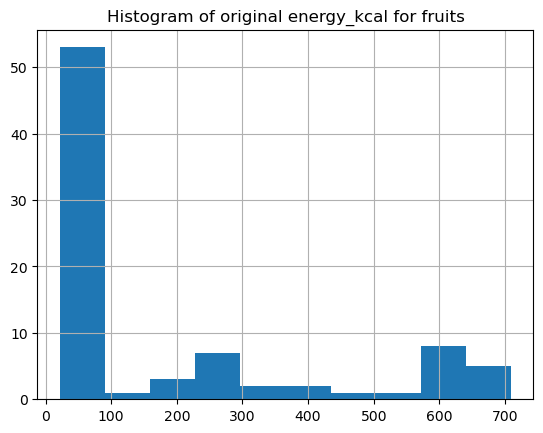

In [29]:
original_fruit_energy.hist();
plt.title('Histogram of original energy_kcal for fruits');

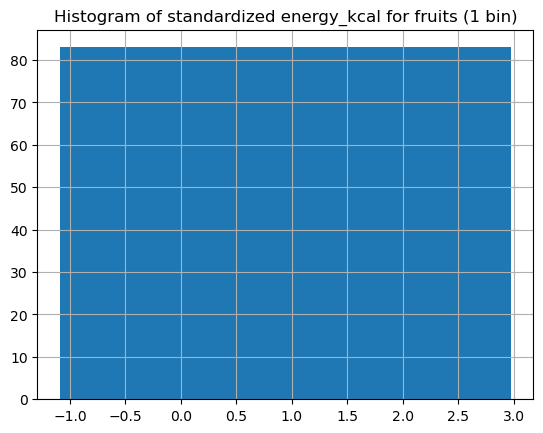

In [30]:
standardized_fruit_energy.hist(bins=1);
plt.title('Histogram of standardized energy_kcal for fruits (1 bin)');

By analyzing these two plots, we can see that the data after standardization is more uniform. On the top plot, we see that values are spread non-uniformly from 0 up around 700, while on the right subplot, all values are in a single bin (from -1 to 3.0). This means that they are on the same scale, which was the goal of standardization. 

Also, it is important to know that standardization does not change the distribution of the data. We can confirm this by looking at the following histogram:

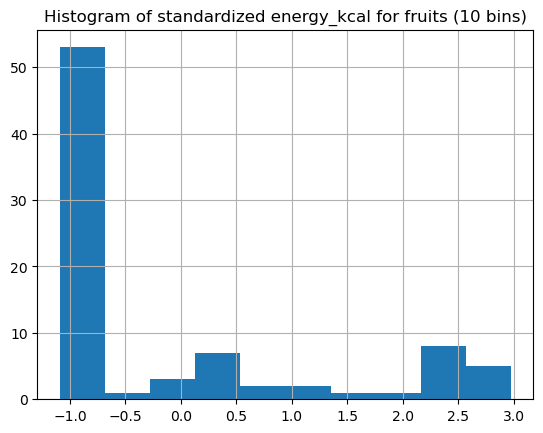

In [31]:
standardized_fruit_energy.hist();
plt.title('Histogram of standardized energy_kcal for fruits (10 bins)');

As we can see, this histogram, with more bins, has the same shape as the first histogram but the range of values is smaller: from -1 to 3.

Now we are going to concatenate the separate `train_set_stand` and `test_set_stand` dataframes in a single standardized dataset and save it in a file:

In [32]:
# concatenate the standardized train and test dataframes
# sort them using the ID/index column
dataset_stand = pd.concat([train_set_stand, test_set_stand]).sort_index()
dataset_stand

# save the standardized dataframe
dataset_stand.to_csv('data/swiss_food_composition_proc.csv')

With this, we conclude the first tutorial. In the next tutorial, we will explore supervised and unsupervised learning.

💡 **CHECKPOINT:**
- Why is standardization important?
- Why `fit_transform()` is applied in the train set and `transform()` in the test set?

**References:**
 - "Machine Learning with Pytorch and Scikit-Learn" - Sebastian Raschka, Yuxi Liu, Vahid Mirjalili, Dmytro Dzhulgakov.
 - Raw data from https://naehrwertdaten.ch/en/downloads/.